<h1> I runed This Code On kaggle But I modified labels Files Locally as I don't have permission of write on kaggle </h1>

In [ ]:
import os
import cv2  
import numpy as np
import matplotlib.pyplot as plt

def get_image_dimensions(image_folder, filename):
    image_path = os.path.join(image_folder, filename)
    image = plt.imread(image_path)
    height, width, _ = image.shape
    return width, height

def convert_to_yolo_format(bbox_coords, image_width, image_height, class_index):
    bbox_coords = bbox_coords[0].split(',')
    bbox_coords = [float(x) for x in bbox_coords]
    x_min, y_min, x_max, y_max = bbox_coords
    
    x_center = (x_min + x_max) / 2
    y_center = (y_min + y_max) / 2
    

    width = x_max - x_min
    height = y_max - y_min
    
    x_center_normalized = x_center / image_width
    y_center_normalized = y_center / image_height
    width_normalized = width / image_width
    height_normalized = height / image_height
    
    return f"{class_index} {x_center_normalized} {y_center_normalized} {width_normalized} {height_normalized}"

def convert_labels_to_yolo(label_folder, image_folder, class_index):
    for filename in os.listdir(label_folder):
        if filename.endswith(".txt"):
            file_path = os.path.join(label_folder, filename)
            with open(file_path, 'r') as file:
                lines = file.readlines()
            
            image_filename = os.path.splitext(filename)[0] + ".tif"  
            image_width, image_height = get_image_dimensions(image_folder, image_filename)
            
            yolo_labels = []
            for line in lines:
                bbox_coords = [coord for coord in line.strip().split()]
                yolo_label = convert_to_yolo_format(bbox_coords, image_width, image_height, class_index)
                yolo_labels.append(yolo_label)
            
            with open(file_path, 'w') as file:
                for yolo_label in yolo_labels:
                    file.write(yolo_label + '\n')

label_folder = "/kaggle/input/yolo-dataset-signature/yolo dataset/Test/labels"
image_folder = "/kaggle/input/yolo-dataset-signature/yolo dataset/Test/images"
class_index = 1

convert_labels_to_yolo(label_folder, image_folder, class_index)

In [ ]:
label_folder = "/kaggle/input/yolo-dataset-signature/yolo dataset/Train/labels"
image_folder = "/kaggle/input/yolo-dataset-signature/yolo dataset/Train/images"
class_index = 1
convert_labels_to_yolo(label_folder, image_folder, class_index)
print("Labels converted to YOLO format and updated in the files.")

In [3]:
! pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.4 kB 600.7 kB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 749.6/749.6 kB 5.0 MB/s eta 0:00:0000:0100:01


In [5]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2
import os
import random
import pandas as pd
import matplotlib.image as mpimg
import seaborn as sns

In [6]:
 # Loading a pretrained model
model = YOLO('yolov8x.pt')

model.train(data = '/kaggle/input/yamel-file/config.yaml',
            epochs = 20,
            seed = 42,
            batch = 8,
            workers = 4)

100%|██████████| 131M/131M [00:00<00:00, 275MB/s] 


Ultralytics YOLOv8.1.45 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=/kaggle/input/yamel-file/config.yaml, epochs=20, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=4, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, s

100%|██████████| 755k/755k [00:00<00:00, 13.4MB/s]
2024-04-08 21:08:58,960	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-04-08 21:08:59,770	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-04-08 21:09:02.776640: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-08 21:09:02.776766: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-08 21:09:02.936184: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS facto

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      2320  ultralytics.nn.modules.conv.Conv             [3, 80, 3, 2]                 
  1                  -1  1    115520  ultralytics.nn.modules.conv.Conv             [80, 160, 3, 2]               
  2                  -1  3    436800  ultralytics.nn.modules.block.C2f             [160, 160, 3, True]           
  3                  -1  1    461440  ultralytics.nn.modules.conv.Conv             [160, 320, 3, 2]              
  4                  -1  6   3281920  ultralytics.nn.modules.block.C2f             [320, 320, 6, True]           
  5                  -1  1   1844480  ultralytics.nn.modules.conv.Conv             [320, 640, 3, 2]              
  6                  -1  6  13117440  ultralytics.nn.modules.block.C2f             [640, 640, 6, True]           
  7                  -1  1   3687680  ultralytics

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...


100%|██████████| 6.23M/6.23M [00:00<00:00, 73.3MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/input/normalized-dataset/yolo_dataset/Train/labels... 660 images, 0 backgrounds, 0 corrupt: 100%|██████████| 660/660 [00:02<00:00, 230.89it/s]

train: WARNING ⚠️ Cache directory /kaggle/input/normalized-dataset/yolo_dataset/Train is not writeable, cache not saved.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/input/normalized-dataset/yolo_dataset/Test/labels... 115 images, 0 backgrounds, 0 corrupt: 100%|██████████| 115/115 [00:00<00:00, 235.57it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/normalized-dataset/yolo_dataset/Test is not writeable, cache not saved.


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      7.98G      1.765      3.064       1.56          6        640: 100%|██████████| 83/83 [00:51<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.72it/s]

                   all        115        130      0.314      0.385      0.299      0.117



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      8.58G       1.79      1.694      1.689          3        640: 100%|██████████| 83/83 [00:51<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.30it/s]

                   all        115        130      0.278      0.308      0.173     0.0764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      8.64G      1.724      1.665       1.64          5        640: 100%|██████████| 83/83 [00:53<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.38it/s]

                   all        115        130      0.278      0.308      0.173     0.0764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20       8.7G      1.736      1.455      1.617         10        640: 100%|██████████| 83/83 [00:52<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.28it/s]

                   all        115        130      0.698      0.669      0.709      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20       8.7G        1.6      1.369      1.569          7        640: 100%|██████████| 83/83 [00:52<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.32it/s]

                   all        115        130      0.258      0.269      0.155     0.0397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      8.66G      1.505      1.268      1.476          9        640: 100%|██████████| 83/83 [00:52<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.29it/s]

                   all        115        130       0.59      0.776      0.738      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      8.71G      1.534      1.222      1.495         13        640: 100%|██████████| 83/83 [00:52<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.31it/s]

                   all        115        130       0.61      0.637      0.608      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      8.58G      1.433      1.142      1.429          8        640: 100%|██████████| 83/83 [00:52<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.28it/s]

                   all        115        130      0.839        0.8      0.869      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      8.58G      1.421      1.076      1.404          7        640: 100%|██████████| 83/83 [00:52<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.30it/s]

                   all        115        130      0.821      0.746      0.848      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      8.62G      1.364      1.019      1.343         12        640: 100%|██████████| 83/83 [00:52<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.31it/s]

                   all        115        130      0.747      0.777      0.826      0.503


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      8.62G      1.306      1.022      1.403          4        640: 100%|██████████| 83/83 [00:52<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.29it/s]

                   all        115        130      0.906      0.815       0.91      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      8.65G      1.263     0.9225      1.385          4        640: 100%|██████████| 83/83 [00:52<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.29it/s]

                   all        115        130      0.868      0.892       0.92      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      8.67G      1.259      0.874      1.402          6        640: 100%|██████████| 83/83 [00:52<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.30it/s]

                   all        115        130      0.879       0.89      0.936      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      8.67G      1.207     0.8141      1.326          4        640: 100%|██████████| 83/83 [00:52<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.32it/s]

                   all        115        130      0.871      0.882      0.948      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      8.68G      1.159     0.7761      1.306          5        640: 100%|██████████| 83/83 [00:52<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.30it/s]

                   all        115        130      0.897      0.872      0.954      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      8.56G      1.113     0.7203      1.244          4        640: 100%|██████████| 83/83 [00:52<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.29it/s]

                   all        115        130      0.894      0.846      0.934       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      8.58G      1.073     0.6943      1.236          4        640: 100%|██████████| 83/83 [00:52<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.28it/s]

                   all        115        130      0.882      0.915       0.96      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      8.58G      1.019     0.6382       1.21          6        640: 100%|██████████| 83/83 [00:52<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.31it/s]

                   all        115        130      0.931       0.94      0.964      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      8.58G     0.9996     0.6192      1.191          4        640: 100%|██████████| 83/83 [00:52<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.30it/s]

                   all        115        130      0.897      0.946       0.97      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      8.61G     0.9536     0.6086      1.156          4        640: 100%|██████████| 83/83 [00:52<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.30it/s]

                   all        115        130      0.934      0.923      0.969      0.748



20 epochs completed in 0.326 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train/weights/best.pt, 136.7MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.1.45 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 68124531 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.69it/s]


                   all        115        130      0.934      0.923      0.969      0.748
Speed: 0.2ms preprocess, 26.0ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/train


lr/pg0,▃▆██▇▇▆▆▆▅▅▄▄▃▃▃▂▂▁▁
lr/pg1,▃▆██▇▇▆▆▆▅▅▄▄▃▃▃▂▂▁▁
lr/pg2,▃▆██▇▇▆▆▆▅▅▄▄▃▃▃▂▂▁▁
metrics/mAP50(B),▂▁▁▆▁▆▅▇▇▇▇█████████
metrics/mAP50-95(B),▂▁▁▄▁▅▄▆▆▆▆▇▇▇▇▇████
metrics/precision(B),▂▁▁▆▁▄▅▇▇▆█▇▇▇██▇███
metrics/recall(B),▂▁▁▅▁▆▅▆▆▆▇▇▇▇▇▇████
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,██▇█▆▆▆▅▅▄▄▄▄▃▃▂▂▂▁▁


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78fe74674d30>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [18]:
def detect(img_path):
    img = cv2.imread(img_path)
    res = model(img)
    res = res[0].plot()
    return res


0: 640x640 1 signature, 97.0ms
Speed: 4.6ms preprocess, 97.0ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


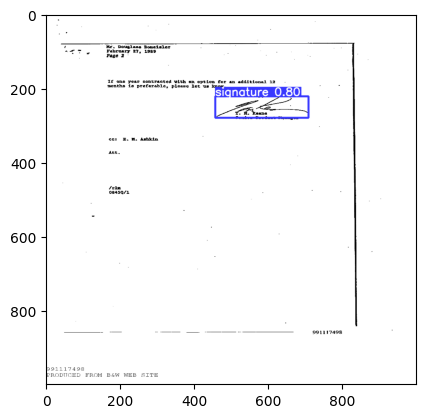

In [21]:
res = detect('/kaggle/input/normalized-dataset/yolo_dataset/Test/images/685.tif')
plt.imshow(res)


0: 640x640 1 signature, 97.6ms
Speed: 3.7ms preprocess, 97.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


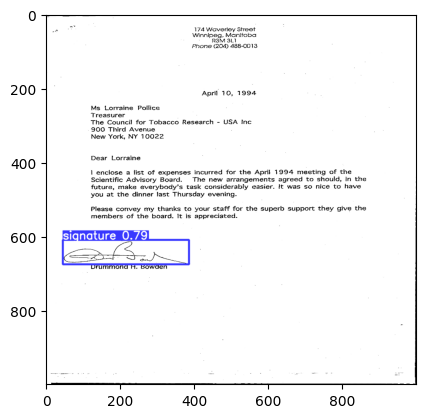

In [25]:
res = detect('/kaggle/input/normalized-dataset/yolo_dataset/Test/images/785.tif')
plt.imshow(res)